In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63621_I')

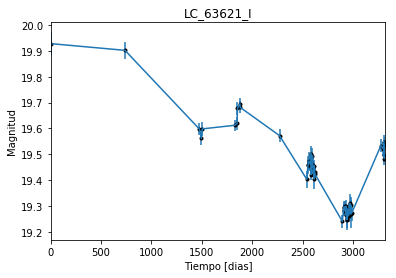

In [2]:
data = np.genfromtxt('LC_63621_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63621_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

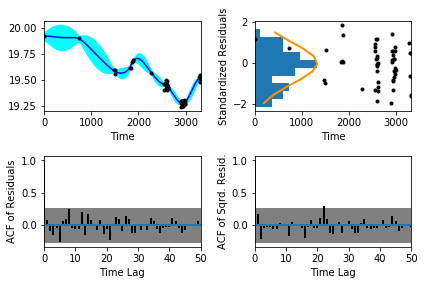

In [5]:
sample.assess_fit()

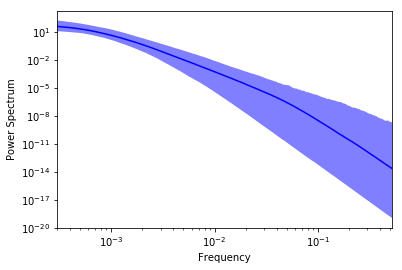

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63621_I')

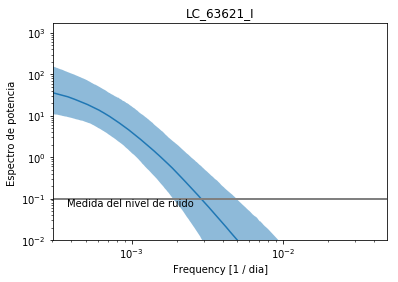

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63621_I')

Text(0.5,1,'Prediccion , valor esperado LC_63621_I')

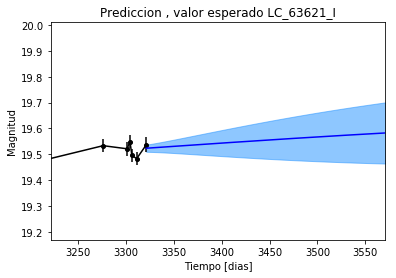

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63621_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63621_I')

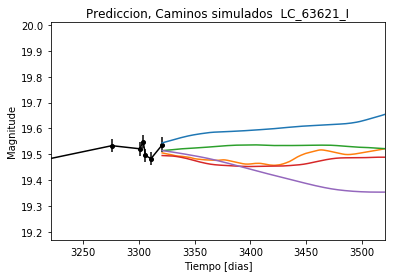

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63621_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63621_I')

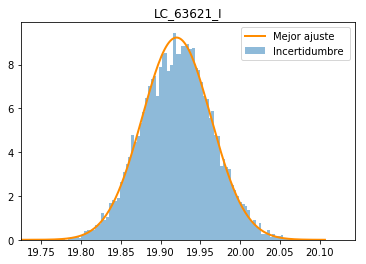

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63621_I')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_I')

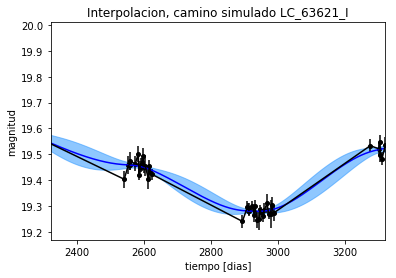

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_I')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_I')

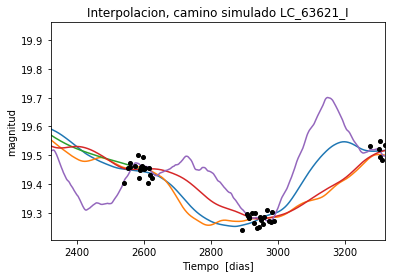

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_I')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 506.074385789
Median: 0.0123950196883
Standard deviation: 0.214963328605
68% credibility interval: [ 0.00075437  0.22932105]
95% credibility interval: [  3.36726649e-04   8.41713813e-01]
99% credibility interval: [  3.06860301e-04   9.98042145e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 656.467481819
Median: 0.000733252688233
Standard deviation: 0.0652997653404
68% credibility interval: [ 0.00036834  0.00661183]
95% credibility interval: [ 0.00031029  0.14086734]
99% credibility interval: [  3.03209162e-04   5.53758627e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1294.92490753
Median: 0.0135386227166
Standard

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1321.04826073
Median: 125.563775702
Standard deviation: 1.55812626127
68% credibility interval: [ 123.81106883  126.61984824]
95% credibility interval: [ 121.25727779  127.16374145]
99% credibility interval: [ 119.29285091  127.34036215]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2263.00513084
Median: 0.688255945218
Standard deviation: 2.18534275226
68% credibility interval: [ 0.04966556  3.98991431]
95% credibility interval: [ 0.01257944  7.37611355]
99% credibility interval: [ 0.00960781  9.59808015]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1555.00879057
Median: 0.168263734789
Standard deviation: 6.87879704795
68% credibility interval: [ 0.00756232  3.60628817]
95% credibility interval: [  4.07137710e-0

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10511.6908227
Median: 1.09988312887e-23
Standard deviation: 1.75835245799e+127
68% credibility interval: [  1.89443794e-54   3.63379677e-05]
95% credibility interval: [  2.62286752e-145   1.38307558e+001]
99% credibility interval: [  1.08472108e-154   6.52434535e+065]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2326.32707328
Median: 19.6582937222
Standard deviation: 0.1397433763
68% credibility interval: [ 19.54051243  19.78349029]
95% credibility interval: [ 19.40024589  19.96140937]
99% credibility interval: [ 19.24664338  20.09811527]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 297.467799861
Median: 0.0
Standard deviation: 0.193614730126
68% credibility interval: [ 0.          0.13170604]
95% credibility interval: [ 0.          0.77144101]
99% credibility interval: [ 0.          0.99902745]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 297.467799861
Median: 0.0
Standard deviation: 0.193614730126
68% credibility interval: [ 0.          0.13170604]
95% credibility interval: [ 0.          0.77144101]
99% credibility interval: [ 0.          0.99902745]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 748.529654392
Median: 0.0
Standard deviation: 0.000169630266265
68% credibility interval: [ 0.

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1321.04826073
Median: 125.563775702
Standard deviation: 1.55812626127
68% credibility interval: [ 123.81106883  126.61984824]
95% credibility interval: [ 121.25727779  127.16374145]
99% credibility interval: [ 119.29285091  127.34036215]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1697.04631102
Median: 0.0563317727746
Standard deviation: 0.0621577543436
68% credibility interval: [ 0.03158259  0.10921262]
95% credibility interval: [ 0.02021375  0.22831867]
99% credibility interval: [ 0.01535209  0.40098674]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2443.44779047
Median: 0.893086891513
Standard deviation: 0.139903645517
68% credibility interval: [ 0.76953581  1.03934003]
95% credibility interval: [ 0.67383745  1.22344153]
99% credibility interval: [ 0.62106885  1.35128428]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 902.530769284
Median: 1.83260220904e-05
Standard deviation: 0.00149865852585
68% credibility interval: [  6.71646457e-07   4.56671780e-04]
95% credibility interval: [  1.80217175e-08   3.71504953e-03]
99% credibility interval: [  3.82892592e-69   8.89692185e-03]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 506.074385789
Median: (-0.0778802055877+0j)
Standard deviation: 1.81774078145
68% credibility interval: [-1.44086663+0.j         -0.00473985-0.00108331j]
95% credibility interval: [ -5.28864386e+00+0.j         -2.11571594e-03-0.0029229j]
99% credibility interval: [ -6.27088374e+00+0.j          -1.92806013e-03-0.00038518j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 656.467481819
Median: (-0.00460716251715+0j)
Standard deviation: 1.28384285676
68% credibility interval: [-0.04154337+0.55984396j -0.00231436+0.j        ]
95% credibility interval: [-0.88509562+2.08970634j -0.00194960+0.j        ]
99% credibility interval: [ -3.47936807e+00+1.24632499j  -1.90511935e-03+0.j        ]
Posterior summary for parameter ar_root